# Hypothesis tests and z-scores

In [ ]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn,ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp.mean()-0.06)/std_error

# Print z_score
print(z_score)


## P value
p-values measure the probability of observing the data assuming the null hypothesis is true. 
A small p-value indicates strong evidence against H0.
### What is hypothesis 
A hypothesis is a statement about an unknown population parameter
Initially, H0 is assumed to be true.
The test ends in either "reject H0 " or "fail to reject H0 "
If the evidence from the sample is "significant" that HA is true, reject H0 , else choose H0

Significance level is "beyond a reasonable doubt" for hypothesis testing
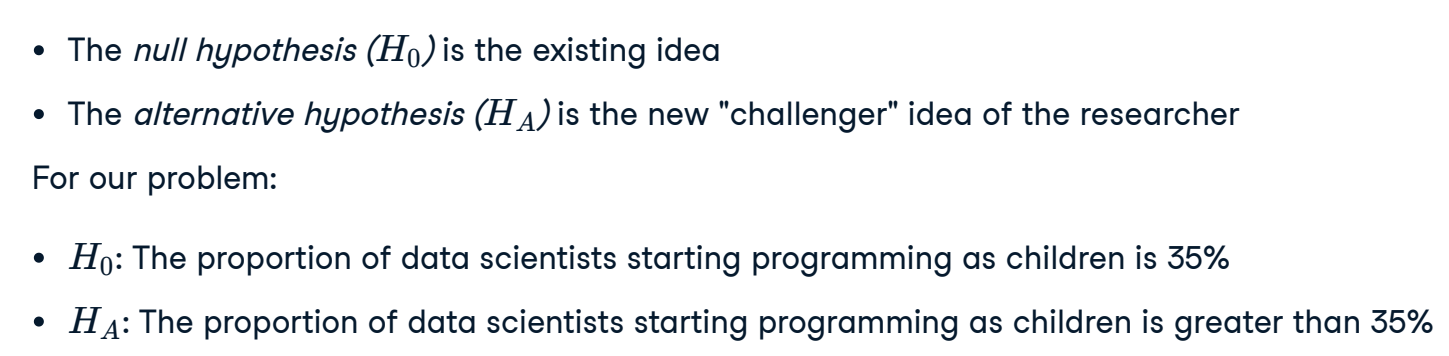

### One-tailed and two-tailed tests
Hypothesis tests check if the sample statistics
lie in the tails of the ``null distribution``
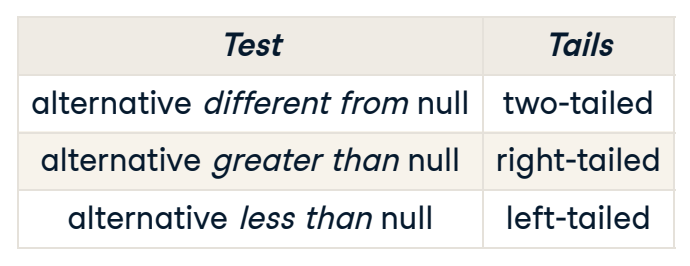

``p-values``: probability of obtaining a result,
assuming the ``null`` hypothesis is ``true``

``Large`` p-value, large support for H0
Statistic likely not in the tail of the null
distribution
``Small`` p-value, strong evidence against H0
Statistic likely in the tail of the null
distribution
``p`` in p-value → probability
"small" means "close to zero"

In [ ]:
# Calculating the hypothesis
#calculate sample statistics
late_prop_samp =(stack_overflow['age_first_code_cut'] == "child").mean()
#set the hypo value
late_prop_hyp=0.36
# calculate std error
std_error =np.std(first_code_boot_distn, ddof=1)

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Calculate the p-value
#* Left tail is norm.cdf()
#* Right tail is 1-norm.cdf()
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

## Statistical significance
The significance level of a hypothesis test (α) is the threshold point for "beyond a reasonable doubt"
Common values of α are 0.2 , 0.1 , 0.05 , and 0.01
> If p ≤ α, reject H0 , else fail to reject H0

### Types of errors
False positives are ``Type I`` errors; false negatives are ``Type`` II errors
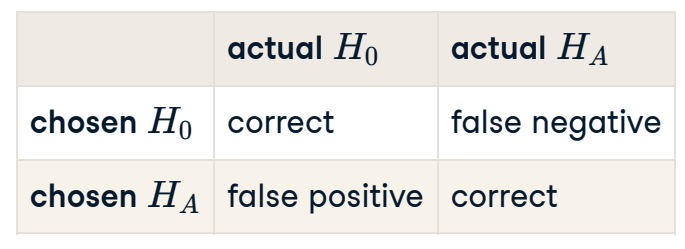


## T-test
The hypothesis test for determining if there is a difference between the means of two populations
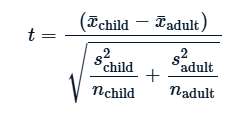
$$
z = \frac{X - \mu}{\sigma}
$$
- \( X \) is the sample stat,
- \( mu \) is the population mean,
- \( sigma \) is the population standard deviation.
$$
t = \frac{X - \bar{X}}{s / \sqrt{n}}
$$
- \( X \) is the difference in sample stats,
- \( bar{X} \) is the difference in population parameters,
- \( s \) is the sample standard deviation,
- \( n \) is the sample size.

In [ ]:
# difference in sample stats
xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
# the sample standard deviation
s= stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
# sample size
n= stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
# Calculate the numerator of the test statistic
numerator = xbar_no-xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no**2/n_no +s_yes**2/n_yes)

# Calculate the test statistic
t_stat = numerator/denominator

# Print the test statistic
print(t_stat)

### Calculating p-values from t-statistics
``t-distributions``: Look like normal distributions, with fatter tails
> Calculating p-values: one proportion vs. a value  
**z-statistic**: needed when using one sample statistic to estimate a population parameter  
**t-statistic**: needed when using multiple sample statistics to estimate a population parameter  
### Degrees of freedom
Larger degrees of freedom → t-distribution gets closer to the normal distribution  
Normal distribution → t-distribution with infinite df  
``Degrees of freedom``: maximum number of logically independent values in the data sample


In [ ]:
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes -2

# Calculate the left-tail p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

### Paired t-tests
Exercise: Conduct a t-test on the sample differences
H0: The proportion of democratic votes in 2012 and 2016 were the same. 
Ha: The proportion of democratic votes in 2012 and 2016 were different.
>Notes:
Using .ttest() lets you avoid manual calculation to run your test. When you have paired data, a paired t-test is preferable to the unpaired version because it reduces the chance of a false negative error.

In [ ]:

# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

import pingouin
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")
# the result shows the p-value less than 0.01, reject null hypotheses

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                              y=sample_dem_data['dem_percent_16'], 
                              paired=True,
                              alternative="two-sided")

### Anova test (Analysis of Variance) 
whether there are significant differences between the means of three or more groups.

In [ ]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(
    x='pack_price',
    y='shipment_mode',
    data = late_shipments
)
plt.show()

The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ``ANOVA`` test. 
``H0``: Pack prices for every category of shipment mode are the same.

``HA``: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.
> Use of pingouin.anova
``data``: This is your dataset, typically a Pandas DataFrame.
``dv``: The dependent variable (the one you're testing differences for between groups).
``between``: The grouping variable (categorical variable representing the groups you want to compare).

In [ ]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova( data = late_shipments,
    dv = 'pack_price',
    between = 'shipment_mode'
)

# Print anova_results
print(anova_results)



In pingouin.pairwise_tests, the ``padjust`` parameter is used to specify the method for adjusting the p-values when performing multiple comparisons. 
This is important to control for the increased risk of **Type I errors (false positives)** when performing multiple tests.

In [ ]:
#* The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.
 # Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(
    data=late_shipments ,
    dv='pack_price',
    between ='shipment_mode',
    padjust='bonf' ) # Modify the pairwise t-tests to use the Bonferroni p-value adjustment.

# Print pairwise_results
print(pairwise_results)
# After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1. reject the null hypothesis that the pack prices are equal

### One-sample proportion tests
 use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size to calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%.


In [ ]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0*(1-p_0)/n)

# Calculate the test statistic
z_score = numerator / denominator

# Print the result
print(z_score)

# Calculate the p-value from the z-score: Right-tailed ("greater than"):
p_value = 1- norm.cdf(z_score)

# Print the p-value
print(p_value)

### Two-sample proportion tests


In [ ]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"]-p_hats["reasonable"] )/std_error

# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score)

# Print p_value
print(p_value)

In [ ]:
# A simpler coding way: Proportion tests using proportions_ztest()
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_group")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([45, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([500+45, 439+16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts,nobs = n,alternative = 'larger')


# Print the results
print(stat, p_value)

### Chi-square test of independence
The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.
> Extend proportions test to more than 2 groups
>  Like the t-distribution, the chi-square distribution has degrees of freedom and non-centrality parameters. When these numbers are large, the chi-square distribution can be approximated by a normal distribution.
>  The chi-square test statistic is a square number, so it is always non-negative, so only the right tail tends to be of interest.

In [ ]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments , x='freight_cost_group', y='vendor_inco_term')

# Print results
print(stats[stats['test'] == 'pearson']) 

#### Chi-square goodness of fit tests

In [ ]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts["n"],color='red' ,label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], alpha=0.5, color="blue", label="Hypothesized")
plt.legend()
plt.show()

# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts['n'], f_exp=hypothesized['n'])

# Print gof_test results
print(gof_test)

### Assumptions in hypothesis testing
> **Randomness**: The samples are random subsets of larger populations
> **Independence of observations**: Each observation (row) in the dataset is independent
> **Large sample size** : The sample is big enough to mitigate uncertainty, so that the Central Limit Theorem applies
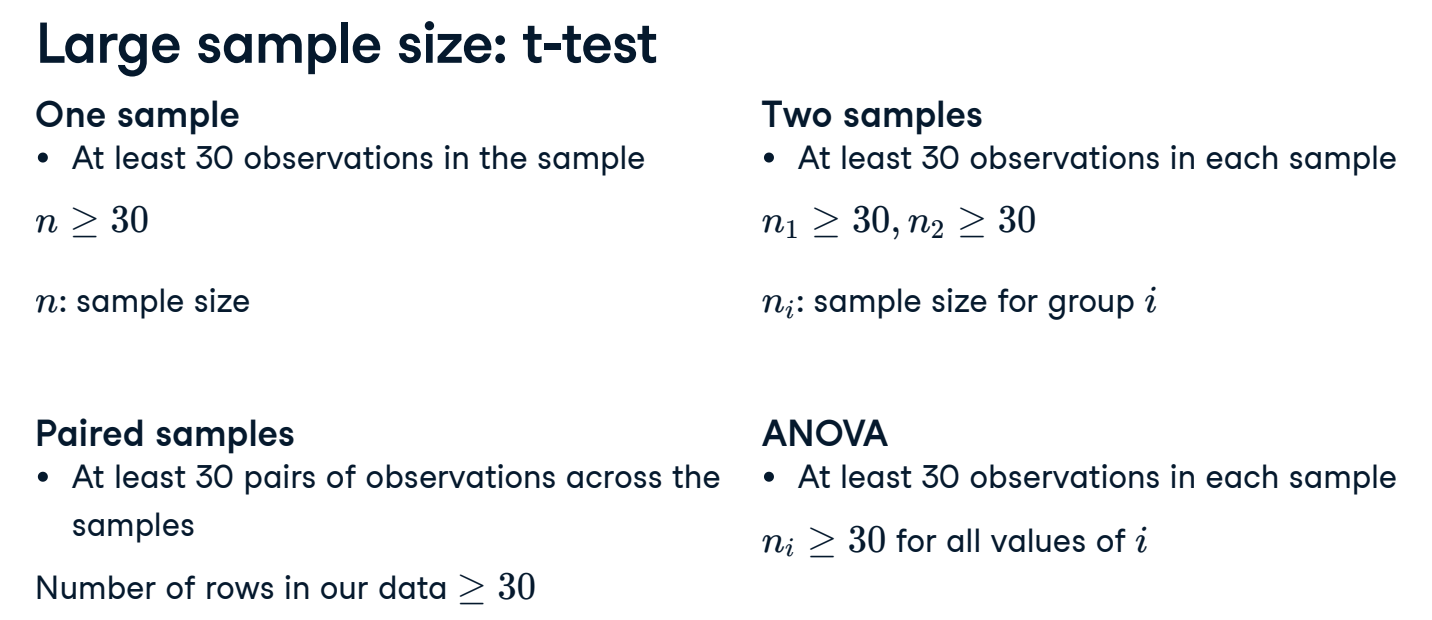
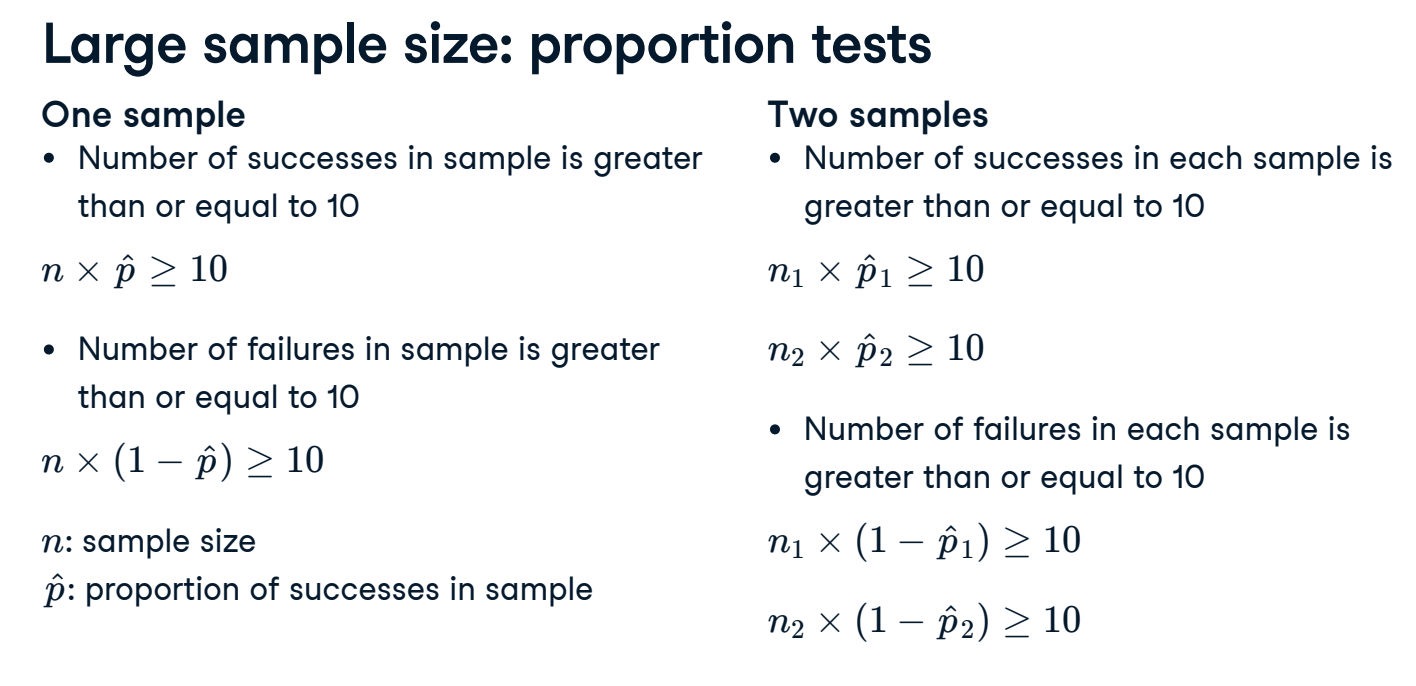
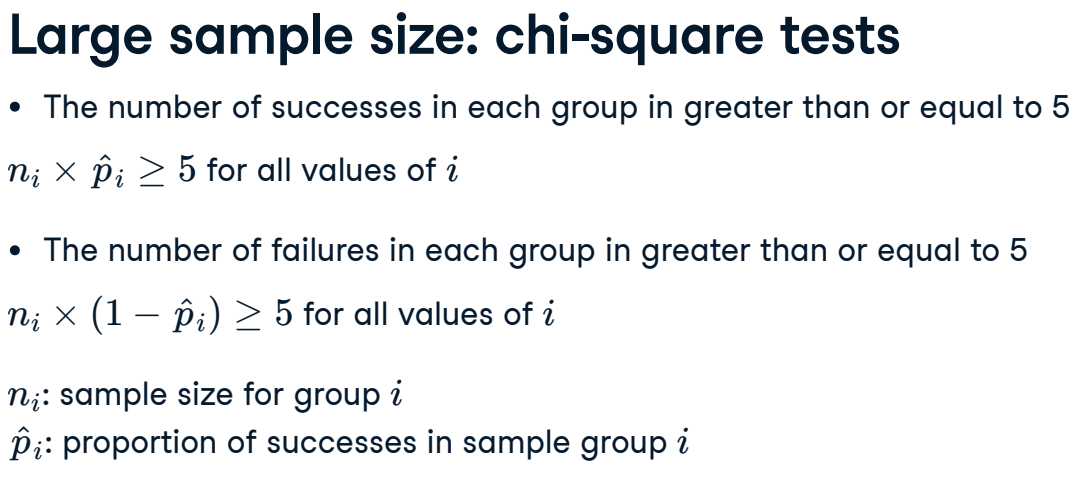

#### How to check sample size

In [ ]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_group'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
# .all() method from pandas can be used to check if all elements are true. For example, given a DataFrame 
print((counts >= 30).all())

#### Non-parametric tests
If the data does not met the above assumption, we can use the Non-parametric tests

In [ ]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest( x=sample_dem_data['dem_percent_12'] ,y=sample_dem_data['dem_percent_16'] ,paired=True,
alternative="two-sided") 

# Print paired t-test results
print(paired_test_results)

# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results =  pingouin.wilcoxon( x=sample_dem_data['dem_percent_12'] ,y=sample_dem_data['dem_percent_16'] ,
alternative="two-sided") 

# Print Wilcoxon test results
print(wilcoxon_test_results)

# Non-parametric ANOVA and unpaired t-tests
Wilcoxon-Mann-Whitney test


In [ ]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms','late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')

weight_vs_late_wide
# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'],
y=weight_vs_late_wide['Yes'],
alternative='two-sided')

# Print the test results
print(wmw_test)

# The Kruskal-Wallis test yielded a very small p-value, \
    # so there is evidence that at least one of the three groups of shipment mode has a different weight distribution than the others. \
        # Th Kruskal-Wallis test is comparable to an ANOVA, which tests for a difference in means across multiple groups.
        
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments,
dv='weight_kilograms',
between='shipment_mode')

# Print the results
print(kw_test)